# SI140A Project : 王柯皓2021533025 徐培钧2021533041

# Project: Performance Evaluation of Bandit Algorithms

- In this project, you will implement several classical bandit algorithms, evluate their performance via numerical comparison and finally gain inspiring intuition.

### $\epsilon$-greedy Algorithm ($0 \leq \epsilon \leq 1$)
<img src="figures/e-greedy.jpg" width="50%" align='left'>

### UCB (Upper Confidence Bound) Algorithm
<img src="figures/UCB.jpg" width="50%" align='left'>

### TS (Thompson Sampling) Algorithm
<img src="figures/TS.jpg" width="50%" align='left'>

### Problems

1. Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N=5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_{j}, j \in \{1,2,3\}$ and oracle values are unknown to all bandit algorithms.

| Arm $j$ | 1   | 2   | 3   |
|---------|-----|-----|-----|
| $\theta_j$ | 0.7 | 0.5 | 0.4 |

**Your anwser of problem 1 in Part I**

We know that if we want to get the theoretically maximized expectation, we just need to the select largest $\theta_{j}, j \in \{1,2,3\}$ for all slots and we will get the expectation $$E[\sum_{t=1}^{N}r_{I(t)}]=5000\cdot 0.7=3500$$

2. Implement aforemented three classical bandit algorithms with following settings: 
   
	- $N=5000$
	- $\epsilon$-greedy with $\epsilon \in \{0.1, 0.5, 0.9\}$.
	- UCB with $c \in \{1,5,10\}$.
	- TS with
    	- $\left\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\right\}$ 
    	- $\left\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)\right\}$

**Your anwser of problem 2 in Part I**

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random, math, copy
### Import more packages if you need

In [32]:
### Feel free to insert more blocks or helper functions if you need.
or_p=[0.7,0.5,0.4]

In [33]:
### Implementation of epsilon-Greedy:
### n is the number of time slots, epsilon is the parameter of the algorithm
### return the total reward
def greedy(n, epsilon):
    #the theta we need to update
    gre_p=[0,0,0] 
    #the count
    count=[0,0,0] 
    #the total reward
    final_r=0
    for i in range(n):
        w=0
        p_1=np.random.uniform(0,1)
        #epsilon operation
        if(p_1<epsilon):
            a=random.choice([0,1,2])
            p_2=np.random.uniform(0,1)
            if(p_2<or_p[a]):
                final_r+=1
                w=1
            count[a]+=1
            gre_p[a]=gre_p[a]+(w-gre_p[a])/count[a]
            #1-epsilon operation
        else:
            a=gre_p.index(max(gre_p))
            p_2=np.random.uniform(0,1)
            if(p_2<or_p[a]):
                final_r+=1
                w=1 
            count[a]+=1
            gre_p[a]=gre_p[a]+(w-gre_p[a])/count[a]
    return final_r


In [34]:
### Implementation of UCB Algorithm:
### n is the number of time slots, c is the parameter of the algorithm
### return the total reward
def UCB(n, c):
    #the theta we need to update
    gre_p=[0,0,0]
    #the count
    count=[0,0,0]
    #theta + delta 
    judge_p=[0,0,0]
    #the total reward
    final_r=0
    for i in range (n):
        w=0
        if(i==0 or i==1 or i==2):
            p_2=np.random.uniform(0,1)
            if(p_2<or_p[i]):
                final_r+=1
                w=1
            count[i]+=1
            gre_p[i]=w
        else:
            judge_p[0]=gre_p[0]+c*math.sqrt(2*math.log(i)/count[0])
            judge_p[1]=gre_p[1]+c*math.sqrt(2*math.log(i)/count[1])
            judge_p[2]=gre_p[2]+c*math.sqrt(2*math.log(i)/count[2])
            #get the index of the largest theta + delta 
            a=judge_p.index(max(judge_p))
            p_2=np.random.uniform(0,1)
            if(p_2<or_p[a]):
                final_r+=1
                w=1
            count[a]+=1
            gre_p[a]=gre_p[a]+(w-gre_p[a])/count[a]
    return final_r

In [35]:
### Implementation of TS Algorithm
### n is the number of time slots, a and b are the parameters of the algorithm
### return the total reward
def TS(n, a, b):
    #prior distribution
    B=[[a[0],b[0]],[a[1],b[1]],[a[2],b[2]]]
    gre_p=[0,0,0]
    final_r=0
    for i in range (n):
        w=0
        gre_p[0]=np.random.beta(B[0][0],B[0][1])
        gre_p[1]=np.random.beta(B[1][0],B[1][1])
        gre_p[2]=np.random.beta(B[2][0],B[2][1])
        #get the index based on the posterior distribution
        a=gre_p.index(max(gre_p))
        p_2=np.random.uniform(0,1)
        if(p_2<or_p[a]):
            final_r+=1
            w=1
        B[a][0]=B[a][0]+w
        B[a][1]=B[a][1]+1-w
    return final_r

3. Regard each of the above setting in problem 2 of Part I as an experiment (in total $8$ experiments).
Run each experiment $200$ independent trials (change the random seed).
Plot the final result (in terms of rewards and regrets) averaged over these $200$ trials.

**Your anwser of problem 3 in Part I**

In [36]:
### Your code for problem 1.3. Feel free to insert more blocks or helper functions if you need.
result=[0,0,0,0,0,0,0,0]
for i in range (200):
    result[0]+=greedy(5000,0.01)
    result[1]+=greedy(5000,0.5)
    result[2]+=greedy(5000,0.9)
    result[3]+=UCB(5000,1)
    result[4]+=UCB(5000,5)
    result[5]+=UCB(5000,10)
    result[6]+=TS(5000,[1,1,1],[1,1,1])
    result[7]+=TS(5000,[601,401,2],[401,601,3])
result[0]=result[0]/200
result[1]=result[1]/200
result[2]=result[2]/200
result[3]=result[3]/200
result[4]=result[4]/200
result[5]=result[5]/200
result[6]=result[6]/200
result[7]=result[7]/200
print("The rewards:")
print("greedy algorithm with 0.1", result[0])
print("greedy algorithm with 0.5", result[1])
print("greedy algorithm with 0.9", result[2])
print("ucb algorithm with 1", result[3])
print("ucb algorithm with 5", result[4])
print("ucb algorithm with 10", result[5])
print("ts algorithm with (1,1),(1,1),(1,1)", result[6])
print("ts algorithm with (601,401),(401,601),(2,3)", result[7])
print("The regrets:")
print("greedy algorithm with 0.1", 3500-result[0])
print("greedy algorithm with 0.5", 3500-result[1])
print("greedy algorithm with 0.9", 3500-result[2])
print("ucb algorithm with 1", 3500-result[3])
print("ucb algorithm with 5", 3500-result[4])
print("ucb algorithm with 10", 3500-result[5])
print("ts algorithm with (1,1),(1,1),(1,1)", 3500-result[6])
print("ts algorithm with (601,401),(401,601),(2,3)", 3500-result[7])

The rewards:
greedy algorithm with 0.1 3488.18
greedy algorithm with 0.5 3075.595
greedy algorithm with 0.9 2745.695
ucb algorithm with 1 3410.46
ucb algorithm with 5 2980.885
ucb algorithm with 10 2827.24
ts algorithm with (1,1),(1,1),(1,1) 3484.075
ts algorithm with (601,401),(401,601),(2,3) 3489.835
The regrets:
greedy algorithm with 0.1 11.820000000000164
greedy algorithm with 0.5 424.4050000000002
greedy algorithm with 0.9 754.3049999999998
ucb algorithm with 1 89.53999999999996
ucb algorithm with 5 519.1149999999998
ucb algorithm with 10 672.7600000000002
ts algorithm with (1,1),(1,1),(1,1) 15.925000000000182
ts algorithm with (601,401),(401,601),(2,3) 10.164999999999964


Thus, we have the answer
$$E(R)_g= \left \{\begin{matrix} 3488.18  &\epsilon=0.1\\ 3075.56  &\epsilon=0.5\\ 2745.70  &\epsilon=0.9\\ \end{matrix}  \right.$$
$$E(R)_u= \left \{\begin{matrix} 3410.46  &c=1\\ 2980.89  &c=5\\ 2827.24  &c=10\\ \end{matrix}  \right.  $$
$$E(R)_t= \left \{\begin{matrix} 3480.08  &(\alpha_1,\beta_1),(\alpha_2,\beta_2),(\alpha_3,\beta_3)=(1,1),(1,1),(1,1)\\ 3489.84  &(\alpha_1,\beta_1),(\alpha_2,\beta_2),(\alpha_3,\beta_3)=(601,401),(401,601),(2,3) \end{matrix}  \right.  $$
$$re_g= \left \{\begin{matrix} 11.82  &\epsilon=0.1\\ 424.41  &\epsilon=0.5\\ 754.30  &\epsilon=0.9\\ \end{matrix}  \right.  $$
$$re_u= \left \{\begin{matrix} 89.54  &c=1\\ 519.11  &c=5\\ 672.76  &c=10\\ \end{matrix}  \right.  $$
$$re_t= \left \{\begin{matrix} 15.93  &(\alpha_1,\beta_1),(\alpha_2,\beta_2),(\alpha_3,\beta_3)=(1,1),(1,1),(1,1)\\ 10.16  &(\alpha_1,\beta_1),(\alpha_2,\beta_2),(\alpha_3,\beta_3)=(601,401),(401,601),(2,3) \end{matrix}  \right.  $$

4. Compute the gaps between the algorithm outputs (aggregated rewards over $N$ time slots) and the oracle value. Compare the numerical results of $\epsilon$-greedy, UCB, and TS.
   - Which one is the best?
   - Discuss the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively. 

**Your anwser of problem 4 in Part I**

the Gap between the algorithm outputs and the oracle value are shown below
 $$Gap_g= \left \{\begin{matrix} 11.82  &\epsilon=0.1\\ 424.41  &\epsilon=0.5\\ 754.30  &\epsilon=0.9\\ \end{matrix}  \right.  $$
$$Gap_u= \left \{\begin{matrix} 89.54  &c=1\\ 519.11  &c=5\\ 672.76  &c=10\\ \end{matrix}  \right.  $$
$$Gap_t= \left \{\begin{matrix} 15.93  &(\alpha_1,\beta_1),(\alpha_2,\beta_2),(\alpha_3,\beta_3)=(1,1),(1,1),(1,1)\\ 10.16  &(\alpha_1,\beta_1),(\alpha_2,\beta_2),(\alpha_3,\beta_3)=(601,401),(401,601),(2,3) \end{matrix}  \right.  $$

In [37]:
### Your code for problem 1.4. Feel free to insert more blocks or helper functions if you need.
# helper func based on greedy for multi-choice
def mean1(x1,j,h):
    a=0
    for i in range (h):
        a+=greedy(j,x1)
    a=a/h
    return a
# helper func based on UCB for multi-choice
def mean2(x1,j,h):
    a=0
    for i in range (h):
        a+=UCB(j,x1)
    a=a/h
    return a
# helper func based on TS for multi-choice
def mean3(x1,x2,j,h):
    a=0
    for i in range (h):
        a+=TS(j,x1,x2)
    a=a/h
    return a
# helper func based on greedy for finding the theta*
def mean1_1(x1,j,h):
    a=0
    for i in range (h):
        if(j!=0):
            a+=greedy(j,x1)/j
    a=a/h
    return a
# helper func based on UCB for finding the theta*
def mean2_1(x1,j,h):
    a=0
    for i in range (h):
        if(j!=0):
            a+=UCB(j,x1)/j
    a=a/h
    return a
# helper func based on TS for finding the theta*
def mean3_1(x1,x2,j,h):
    a=0
    for i in range (h):
        if(j!=0):
            a+=TS(j,x1,x2)/j
    a=a/h
    return a


#### First we consider the numerical results of $\epsilon$-greedy, UCB, and TS. 

In order to avoid the error caused by array order, we assume the real paramters to be 、


| Arm $j$ | 1   | 2   | 3   |
|---------|-----|-----|-----|
| $\theta_j$ | 0.4 | 0.7 | 0.5 |

so the result won't change.

To start with, we want to know the best proper results that each algorithm can provide. Thus, we first foucs on the  $\epsilon$-greedy algorithm and we let the $\epsilon$ to be various to find the value of $\epsilon$ which could provide the best result. 

Then, we will get a plot below.

# （See complete code in the code file sent through email）

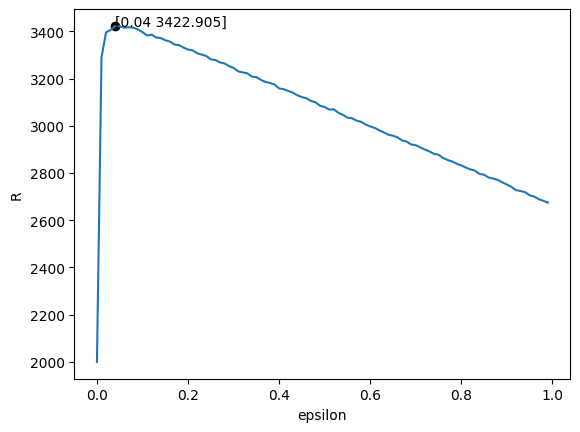

In [38]:
or_p[0]=0.4
or_p[1]=0.7
or_p[2]=0.5
x1=[i/100 for i in range(100)]
y1=[mean1(x1[i],5000,200) for i in range(100)]
y_1_max=y1.index(max(y1))
show_max='['+str(x1[y_1_max])+' '+str(y1[y_1_max])+']'
plt.plot(x1[y_1_max],y1[y_1_max],'ko')
plt.plot(x1,y1)
plt.annotate(show_max,xy=(x1[y_1_max],y1[y_1_max]),xytext=(x1[y_1_max],y1[y_1_max]))
plt.xlabel("epsilon")
plt.ylabel("R")
plt.show()

From the plot, we can get the ideal $\epsilon$ to be $0.04$ whose leading result is $3422.905$. Then, we apply the same method to the UCB  algorithm to find the proper $c$. We will get another plot shown below.

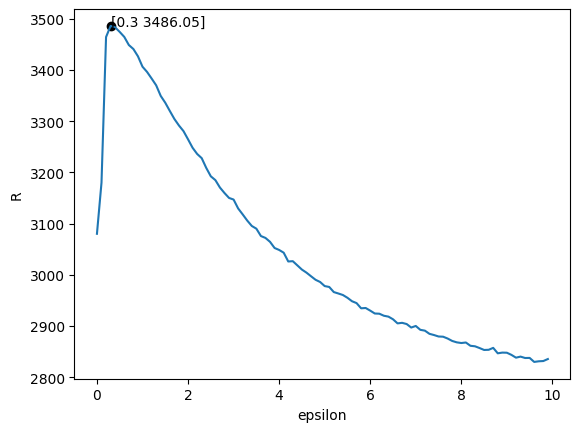

In [39]:
x2=[i/10 for i in range(100)]
y2=[mean2(x2[i],5000,200) for i in range(100)]
y_2_max=y2.index(max(y2))
show_max='['+str(x2[y_2_max])+' '+str(y2[y_2_max])+']'
plt.plot(x2[y_2_max],y2[y_2_max],'ko')
plt.plot(x2,y2)
plt.annotate(show_max,xy=(x2[y_2_max],y2[y_2_max]),xytext=(x2[y_2_max],y2[y_2_max]))
plt.xlabel("epsilon")
plt.ylabel("R")
plt.show()

From the plot, we can get the ideal $c$ to be $0.3$ whose leading result is $3486.05$. 

Finally, we focus on the TS algorithm. We know that the core idea of TS algorithm is Beta-Binomial Conjugacy so the proper $\alpha$ $\beta$ should be close to the ideal number of successes or failures in a fixed $N$ times tries with a certain arm according to the real probability of its $\theta$
 
Therefore, according to the oracle's probability. We will get one possible ideal pairs of $\alpha$ $\beta$ to be $(\alpha_{0.7},\beta_{0.7})=(700,300)$,$(\alpha_{0.5},\beta_{0.5})=(500,500)$, $(\alpha_{0.4},\beta_{0.4})=(400,600)$

(We know that the number of $\alpha$ $\beta$ could represent the number of successes or failures in the previous experiments so the larger these values are means the more experiments had been done, and the more accurate our prior distribution will be. However, we cannot allow them to increase infinitely here. Therefore, we specify the total of number of tries to be 1000)

From the analysis above, we change the settings of three algorithm: 
- $\epsilon$-greedy with $\epsilon=0.04$.
- UCB with $c=0.3$.
- TS with
    - $\left\{(\alpha_1,\beta_1)=(400,600),(\alpha_2,\beta_2)=(700,300),(\alpha_3,\beta_3)=(500,500)\right\}$ 
Then, we consider the change in the final results and the gaps by varying the total number of time slots i.e. $N$ and we will get two plots below

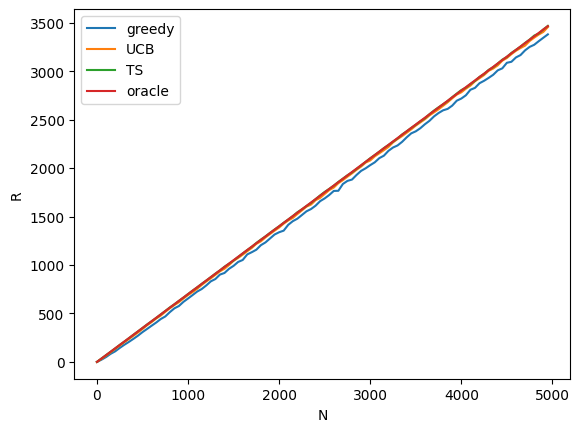

In [49]:
x1=[50*i for i in range(100)]
y1=[mean1(0.04,x1[i],100) for i in range(100)]
x2=[50*i for i in range(100)]
y2=[mean2(0.3,x2[i],100) for i in range(100)]
x3=[50*i for i in range(100)]
y3=[mean3([400,700,500],[600,300,500],x3[i],100) for i in range(100)]
x4=[50*i for i in range(100)]
y4=[0.7*x4[i] for i in range(100)]
plt.plot(x1,y1,label="greedy")
plt.plot(x2,y2,label="UCB")
plt.plot(x3,y3,label="TS")
plt.plot(x4,y4,label="oracle")
plt.legend()
plt.xlabel("N")
plt.ylabel("R")
plt.show()

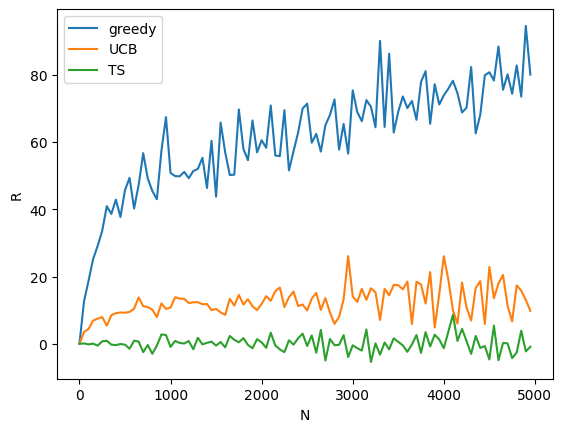

In [50]:

x1=[50*i for i in range(100)]
y1=[0.7*x1[i]-mean1(0.04,x1[i],100) for i in range(100)]
x2=[50*i for i in range(100)]
y2=[0.7*x2[i]-mean2(0.3,x2[i],100) for i in range(100)]
x3=[50*i for i in range(100)]
y3=[0.7*x3[i]-mean3([400,700,500],[600,300,500],x3[i],100) for i in range(100)]
plt.plot(x1,y1,label="greedy")
plt.plot(x2,y2,label="UCB")
plt.plot(x3,y3,label="TS")
plt.legend()
plt.xlabel("N")
plt.ylabel("R")
plt.show()

From the plot above, it is obvious that the greedy algorithm is worse than the other two algorithms because its gap tending towards linear growth.

Additionally, when we compare the the reference $\theta^*$ (the largest $\theta$ we got by averaging the value of the $\theta_j$ we choose each slot), we will get another plot.

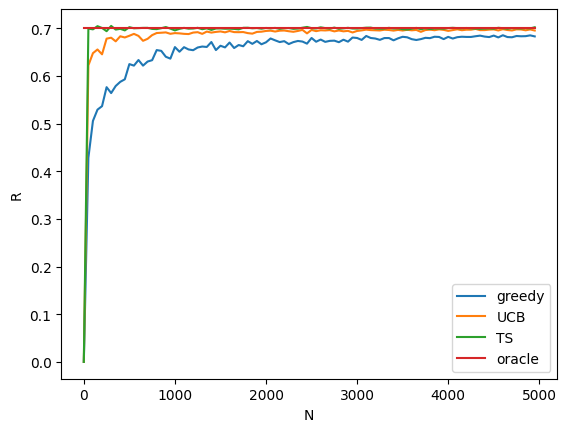

In [51]:

x1=[50*i for i in range(100)]
y1=[mean1_1(0.04,x1[i],50) for i in range(100)]
x2=[50*i for i in range(100)]
y2=[mean2_1(0.3,x2[i],50) for i in range(100)]
x3=[50*i for i in range(100)]
y3=[mean3_1([400,700,500],[600,300,500],x3[i],50) for i in range(100)]
x4=[50*i for i in range(100)]
y4=[0.7 for i in range(100)]
plt.plot(x1,y1,label="greedy")
plt.plot(x2,y2,label="UCB")
plt.plot(x3,y3,label="TS")
plt.plot(x4,y4,label="oracle")
plt.legend()
plt.xlabel("N")
plt.ylabel("R")
plt.show()

From the plot, we know that the reference $\theta^*$ gained from the TS algorithm is closer to the real one. Generally, we find that with the best parameters we found, TS performed best, the UCB performed second best while the greedy's result seemed to be the worst. 


However, the results obtained from the image are similar to the theoretical analysis results but we still need to discuss the difference between them through theoretical analysis to gain a more convincing conclusion. 

To better compare these three algorithms We decide to give a brief introduction to them.

1. Greedy algorithm
    - As we all know, the sample mean $$\bar{X}=\frac{1}{n}\sum_{j=1}^{n}X_j$$ tends to the mean $\mu$ of the real distribution when $n$ is large. Greedy algorithm also uses this property. We know that for every $\theta_j$, we let $$\theta_j=\frac{\sum r_{\theta_j}}{n}$$ where $r_{\theta_j}$ is the reward gained through $\theta_j$ and $n$ is the number of slots that we select $\theta_j$. Thus, we have when  $n-> \infty$, $\theta_j$ is close to the value gained from oracle. Furthermore, we specify two operations, one is that we have the probability of $\epsilon$ to explore the value of each $\theta_j$ randomly and change the $\theta_j$ from the feedback $$\theta_j=\frac{\sum r_{\theta_j}+1/0}{n+1}$$ and the other one is that we have the probability of $1-\epsilon$ to select the largest $\theta_j$ based on the value of $\theta_j$ we have now. During the whole experiment, we just keep selecting one of the two operations and ultimately get the result.



2. UCB algorithm
    - The UCB algorithm also based on the property of the sample mean which means that we update our $\theta_j$ also by applying $$\theta_j=\frac{\sum r_{\theta_j}+1/0}{n+1}$$. However, it uses the Chernoff-Hoeffding Bound to consider the difference between every $\theta_j$ we updated in time slots and its value gained from oracle.
    $$P(|\theta_j-\theta_{\mu}|\le \delta)\ge 1-2e^{-2n\delta^2}$$
    ($\theta_{\mu}$ is the value gained from oracle)

    
    Thus, we just need to select a proper value of $\delta$ to let $1-2e^{-2n\delta^2}$ become small enough, and we could regard $\theta_j+\delta$ a new $\theta_j$ for our comparison to find the proper $I(t)$ in each slot and we define them as $\theta^1_j$. Due to the $1-2e^{-2n\delta^2}$ becoming small, $\theta^1_j$ will be extremely similar to the $\theta_{\mu}$. Therefore, finding the proper $I(t)$ through $\theta^1_j$ is more reasonable.  According to the caculation, we find that when $\delta=\sqrt{\frac{2lnt}{n}}$ (where $t$ is the number of slots and $n$ is the number of slots selecting $\theta_j$), we have 
    $$P(|\theta_j-\theta_{\mu}|\le \sqrt{\frac{2lnt}{n}})\ge 1-\frac{2}{t^4}$$
    the $1-\frac{2}{t^4}$ is small enough so we can define $\delta=c\sqrt{\frac{2lnt}{n}}$ and get the result by finding the max $\theta^1_j$ in all time slots.
   


3. TS algorithm
    - The TS algorithm is mainly based on Beta-Binomial Conjugacy. Thus, once we gain the proper prior distribution for each $\theta_j$, we can just regard each slot as a bernouli trail with the selected $\theta_j$. If the reward is $1$, we just gain the posterior distribution as $(\alpha+1, \beta)$, if the reward is $0$, we just gain the posterior distribution as $(\alpha, \beta+1)$. Then, we let this posterior distribution to be the new prior distribution and so on. 

Based on the introduction above, we know that for the greedy algorithm, there is a probability of $\epsilon$ to explore the value of each $\theta_j$ randomly, but this randomness will lead to a huge difference in the number of times each $\theta_j$ is explored, which leads to that some $\theta_j$ may only be explored several times in the entire experiment process. Too few explorations of certain $\theta_j$ will result in a large difference between itself and the real possibility, which leads to the results that do not match the oracle's values. Thus, the greedy algorithm is the worst among these three algorithms.

Then, the UCB algorithm has some improvement comparing to the greedy algorithm because for those $\theta_j$ s that have been contiuely selected throughout the initial stage, the algorithm would reduce their value of $\delta$ because the distance $|\theta_j-\theta_{\mu}|$ became smaller which meaned we just needed a smaller $\delta$ to fill part of this distance, so their $\theta^1_j$ participating in the comparison was basically equivalent to the $\theta_j$ obtained from the experiment. For those $\theta_j$ that were not selected at the initial stage, their $\delta$ s continued to increase because as $1-2e^{-2n\delta^2}$ became smaller with larger $t$, the distance $|\theta_j-\theta_{\mu}|$ didn't change, so we needed a larger $\delta$ to fill part of the distance to satisfy the Chernoff-Hoeffding Bound. If their real value was greater than some selected $\theta_j$ s', then their $\delta$ s' increase would ultimately cause the value of their $\theta^1_j$ used for comparison to exceed others $\theta^1_j$ corresponding to the $\theta_j$ s that have been selected but its real value is smaller than theirs. Therefore, they could be more likely to be selected in the remaining slots.

For the TS algorithm, due to the existence of a prior distribution, we can make the difference between $\theta_j$ and the value gained by oracle tend to $0$ in very few experiments, as long as we can obtain an accurate prior distribution. That is to say, if our prior distribution is accurate enough, the TS algorithm would be better than the UCB algorithm because we do not need a lot of experiments to update the value of $\theta_j$ and reduce the value of $\delta$ to gain the ideal value. However, if the prior distribution is not accurate, the TS algorithm would be worse than the UCB algorithm because an improper prior distribution may require us to correct the errors in the prior distribution through more experiments, resulting in a posterior distribution that is closer to the true distribution.

To sum up, in my opinion, the UCB algorithm is the best algorithm among the three algorithms because it is always difficult to obtain an appropriate prior distribution in practical problems, which requires a large number of experimental samples, and an improper prior distribution will cause us to spend more time to form a correct posterior distribution. As for the Greedy algorithm, the randomness problem in it might lead to a large deviation in the result. Therefore, the UCB algorithm has a greater fault tolerance rate and a more stable demand for time slots, making it the preferred choice in real applications.


#### Second, we focus on the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively. 
1.  $\epsilon$:
    - We know that for every slot, $\epsilon$ is the probability to randomly choose one of the $\theta_j$ s and update its value through our reward. Therefore, if $\epsilon$ is large, Our algorithm process tends to randomly choose one arm from multiple arms each slot to play the game, rather than the arm with the highest probability of winning a reward. Thus, $\epsilon$ should be as small as possible to reduce the impact of randomness. However, if the $\epsilon$ is too small, we cannot gain a proper exploration process because once we update a $\theta_j$ by random selection, we will use this $\theta_j$ for a extreme long time because other $\theta_j$ couldn't be selected randomly for a long time to update so they remained $0$. Thus, the largest $\theta_j$ will be the first fortunate $\theta_j$ we select in a rare opportunity of random selection and this will definitely lead to a wrong result. 

Therefore, $\epsilon$ should not be extreme small or big and from the plot, we get the proper $\epsilon$ is $0.06$.

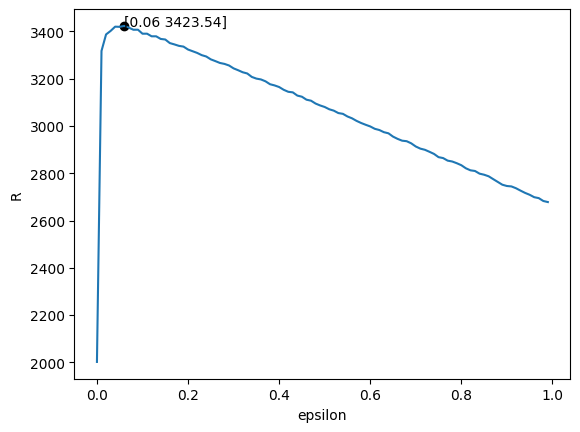

In [43]:
x1=[i/100 for i in range(100)]
y1=[mean1(x1[i],5000,200) for i in range(100)]
y_1_max=y1.index(max(y1))
show_max='['+str(x1[y_1_max])+' '+str(y1[y_1_max])+']'
plt.plot(x1[y_1_max],y1[y_1_max],'ko')
plt.plot(x1,y1)
plt.annotate(show_max,xy=(x1[y_1_max],y1[y_1_max]),xytext=(x1[y_1_max],y1[y_1_max]))
plt.xlabel("epsilon")
plt.ylabel("R")
plt.show()

2. $c$
    - From the Chernoff-Hoeffding Bound, we know that if we want that the $\theta_j$ could use less number of time slots to tend towards $\theta_{\mu}$, the value gained from oracle, we need $1-2e^{-2n\delta^2}$ to be smaller. We have $$P(|\theta_j-\theta_{\mu}|\le c\sqrt{\frac{2lnt}{n}})\ge 1-\frac{2}{t^{4c^2}}$$. We find that $c$ should be as small as possible to reduce the value of $1-2e^{-2n\delta^2}$. However, there is one thing that we need to pay attention to which is that we still need $\theta_j+\delta$ to be the basis for us to select $I(t)$ so if $c->0$, we have $\delta->0$ and $\theta_j+\delta->\theta_j$. Therefore, we just compare the $\theta_j$ based on their Initial value and it will also lead to a wrong result. 
    
    Thus, $c$ should not be extreme small or big and from the plot, we get the proper $c$ is $0.3$.

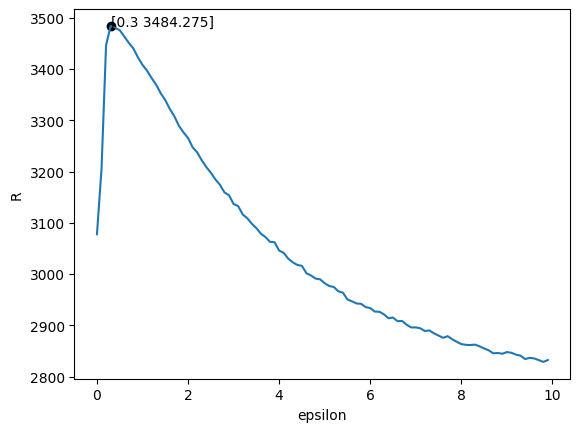

In [44]:
x2=[i/10 for i in range(100)]
y2=[mean2(x2[i],5000,200) for i in range(100)]
y_2_max=y2.index(max(y2))
show_max='['+str(x2[y_2_max])+' '+str(y2[y_2_max])+']'
plt.plot(x2[y_2_max],y2[y_2_max],'ko')
plt.plot(x2,y2)
plt.annotate(show_max,xy=(x2[y_2_max],y2[y_2_max]),xytext=(x2[y_2_max],y2[y_2_max]))
plt.xlabel("epsilon")
plt.ylabel("R")
plt.show()

3. $\alpha_{j}$, $\beta_{j}$
    - From the analysis above, we know that if $\alpha_{j}$, $\beta_{j}$ can form a accurate prior distribution, the results we obtained in the initial stage of the experiment will have a very small difference from the ideal value. However, if our prior distribution is improper, we need extensive number of experiments to correct our distribution. As for the example given for this problem, a proper $(\alpha_{j}$, $\beta_{j})$ for a $\theta_j$ should be $(\theta_{\mu}M, (1-\theta_{\mu})M)$ where $M$ is large and $\theta_{\mu}$ is the value we gain from oracle.

5. Give your understanding of the exploration-exploitation trade-off in bandit algorithms.

**Your anwser of problem 5 in Part I**

1. $\epsilon$-greedy 
    - The main exploration part of $\epsilon$-greedy algorithm is the operation that we randomly choose a $\theta_j$ to update its value. The main exploitation part of it is the operation we choose the largest $\theta_j$ based on the current value of all $\theta_j$. Therefore, for each slot, we have a probability of $\epsilon$ to perform the main exploration process and a probability of $1-\epsilon$ to perform the main exploitation process, which means the trade-off of the exploration-exploitation is based on the value of $\epsilon$. We find that the process of randomly selection is a total exploration process but for the process of selecting the largest $\theta_j$, it not only can be regard as a exploration process because it still need to receive the feedback to update the value of $\theta_j$, but also can be regard as a exploitation process because in every slot, we select the arm with the largest probability to gain the reward. Therefore, it is possible for us to abandon the complete random exploration part because it is inefficient and might not be beneficial to all $\theta_j$. Therefore, we decide to only remain the $1-\epsilon$-operation and hope to improve it. 
2. UCB
    - Based on the $\epsilon$-greedy algorithm, the UCB algorithm successfully improved the $1-\epsilon$-operation by using the Chernoff-Hoeffding Bound so we can explore and exploit at the same time, which means there is a better balance between them. It compares $\theta_j+\delta$ instead of the single $\theta_j$ and select the largest $\theta_j+\delta$ to update the corresponding $\theta_j$ . 
    - This algorithm ensure the comprehensiveness of exploration with the changes in $\delta$ during the whole process as we mentioned in the answer of problem $3$. First, our exploration can be regared randomly at the beginning because all $\theta_j$ s' Initial value just based on one exploration result. Second, we begin to use Chernoff-Hoeffding Bound to select the "best choice" during the process. For the $\theta_j$ s which were selected during the initial random selection stage, their $\theta_j+\delta$ became closer to $\theta_{\mu}$ which is the value gained from oracle,  and $\theta_j$ s also became closer to $\theta_{\mu}$ so their $\delta$ became smaller. However, for the $\theta_j$ s which were not selected during the initial random selection stage, their $\theta_j+\delta$ would also trend to $\theta_{\mu}$ because when $t$ became larger, $1-\frac{2}{t^{4c^2}}$ became smaller but $\theta_j$ s didn't change. Therefore, although the value of selected $\theta_j$ seemed to become larger than the non-selected $\theta_j$ s' at the beginning, if the non-selected ones'$\theta_{\mu}$ is larger than the selected one, the non-selected one will definitely be selected as well during the process with the large number of time slots because the distance between the $\theta_j+\delta$ of the non-selected one and the $\theta_{\mu}$ will finally smaller than the distance between the $\theta_j+\delta$ of the non-selected one and the $\theta_j+\delta$ of the selected one. 
    - Additionally, the UCB algorithm also optimizes the exploitation process. The greedy algorithm uses $\theta_j$ as the basis for choosing $I(t)$, but the initial value of $\theta_j$ is far from the real value of it for a long time, so taking it as the basis will bring a certain amount of errors at the beginning. However, the USB algorithm uses $\theta_j+\delta$ instead of $\theta_j$ because through the Chernoff-Hoeffding Bound, $\theta_j+\delta$ will trend to $\theta_{\mu}$ as $t$ becoming larger, even the initial $\theta_j+\delta$ is much closer to $\theta_{\mu}$ than $\theta_j$ is. Therefore, our exploitation would depend on a more accurate value and our result will also be better.
    
3. TS
    - The TS algorithm is a little different from the two other algorithm we mentioned above. Instead of starting with the exploration, the TS algorithm entered the exploitation part in its initial stage. It have to use its prior distribution to obtain the posterior distribution and then get the result. It also mixs the exploitation part and the exploration part into one step as the UCB algorithm does. However, the exploration and the exploitation are more closely related in the TS algorithm because, for example, our $q$ th exploitation is completely based on the posterior distribution, and the $q$ th posterior distribution is completely based on the $q-1$ th posterior distribution (our $q-1$ th exploitation based on) and our $q$ th exploration. Therefore, the count of slots and the count of reward do not have a direct impact on exploitation and exploration. The exploitation and exploration just interact with each other. Thus, if our initial prior distribution is extremely closer to the real distribution, we will get a perfect posterior distribution in a very small number of slots because the initial exploitation part will then lead to a ideal exploration result (a ideal reward) and the exploration result will make our posterior distribution more reasonable so the next exploitation can perform better. Under such mutual promotion, our results will be more accurate than the two algorithms above. However, if our initial prior distribution is bad, the bad exploitation result will lead to a poor result and we need a extremely long time to optimize our posterior distribution because we can only make corrections through the results of exploration.

6. We implicitly assume the reward distribution of these three arms are independent. How about the dependent case?
	Can you design an algorithm to exploit such information to obtain a better result?

**Your anwser of problem 6 in Part I**

We find that if the cases are no longer independent, it will be extremely hard to find a certain distribution for the $\theta_j$. Thus, we decide to give up focusing on the distribution of these $\theta_j$ and we consider on how to get the highest rewards. Thus, we just need to focus on the probability of choosing each arm and we define it as $P_{t,j}$. We hope that the arm with the largest probability could also be the arm we exactly need for maximizing the ideal total reward. We find a algorithm called "Exp3" to solve this problem. 

First, we define $R_t$ as reward we get for each time slot so we have $$P_{t,j}=P(I_t=j|I_1,I_2,A_3,...,I_{t-1},R_1,R_2,...R_{t-1})$$  which shows that $P_{t,j}$ is based on the choices and rewards in the previous $t-1$ slots.

Second, we define a estimator $$\bar{r}_{t,j}=1-\frac{I(I(t)=j)(1-r_t)}{P_{t,j}}$$ 
where $I(I(t)=j)$ is an indicator to indicate whether we have chosen the $j$ th arm
so we have $$E(\bar{r}_{t,j})=1-\frac{1-r_t}{P_{t,j}}E(I(I(t)=j))=1-\frac{1-r_t}{P_{t,j}}P_{t,j}=r_t$$ which means that based on the previous $t-1$ slots'conditions, the expectation of the estimated value $\bar{r}_{t,j}$ is basically consistent with $r_t$


Third, we define $S_{t,j}=\sum_{i=1}^{t}\bar{r}_{t,j}$ so we can map $S_{t,j}$ into probability by a method called exponential weighting. Then, we will get a equation:
$$P_{t,j}=\frac{P_{t-1,j}e^{\eta S_{t-1,j}}}{\sum_{i=1}^{t}P_{t-1,j}e^{\eta S_{t-1,i}}}$$ 

where $\eta$ is what we called learn rate. When $\eta$ is large, we are more likely to apply exploitation strategy which means that we generally select the largest $\theta_j$ of all current value to obtain the reward, just as the $1-\epsilon$-operation in $\epsilon$ greedy algorithm. However, when $\eta$ is small, we are more likely to apply exploration strategy which means that we generally select the $\theta_j$ randomly to obtain the reward, just as the $\epsilon$-operation in $\epsilon$ greedy algorithm.

The pseudo code for the following operation is shown below.



$$
\begin{aligned}
&\text { Exp3 } \\
&\textbf { input } \eta \\
&\text { Initialize } S_{0,j}=0,  P_{1,j}=\frac{1}{3} , j \in \{ 1,2,3 \}\\
&\text { 1:}\textbf{ for } t=1,2,...,N \text { do }\\
&\text { 2:} \quad P_{t,j}=\frac{P_{t-1,j}e^{\eta S_{t-1,j}}}{\sum_{i=1}^{t}P_{t-1,j}e^{\eta S_{t-1,i}}}\\
&\text { 3: } \quad I(t) \gets \mathop{\arg\max}\limits_{j \in \{ 1,2,3 \}} P_{t,j} \\
&\text { 4: } \quad \textbf { for } j=1, 2, 3 \\
&\text { 5: } \quad  \quad S_{t,j}=S_{t-1,j}+1-\frac{I(A_t=j)(1-r_t)}{P_{t,j}}\\
&\text { 6:}  \quad  \quad\textbf{end for } \\
&\text { 7:}\textbf{end for } \\
\end{aligned}
$$

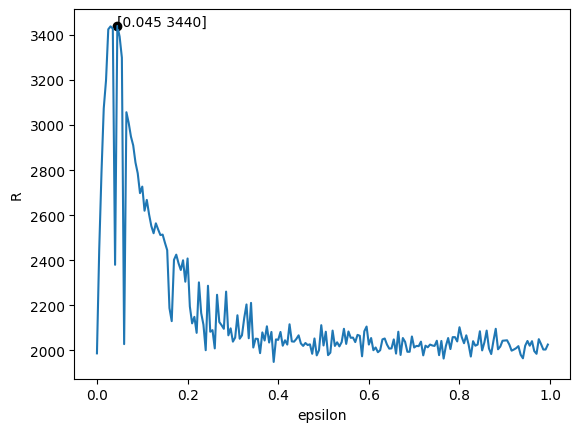

In [45]:
### Your code for problem 1.6. Feel free to insert more blocks or helper functions if you need.
x5=[i/200 for i in range(200)]
y5=[0 for i in range(200)]
for j in range (200):
    p1=[1/3,1/3,1/3]
    p2=[0,0,0]
    S=[0,0,0]
    b=0
    l=x5[j]
    for i in range (5000):
        Y=[0,0,0]
        X=0
        if(i!=0):
            #update the p_t$
            p1[0]=p2[0]*math.exp(l*S[0])/p2[0]*(math.exp(l*S[0])+math.exp(l*S[1])+math.exp(l*S[2]))
            p1[1]=p2[1]*math.exp(l*S[1])/p2[1]*(math.exp(l*S[0])+math.exp(l*S[1])+math.exp(l*S[2]))
            p1[2]=p2[2]*math.exp(l*S[2])/p2[2]*(math.exp(l*S[0])+math.exp(l*S[1])+math.exp(l*S[2]))
        a=p1.index(max(p1))
        Y[a]=1
        p_2=np.random.uniform(0,1)
        if(p_2<or_p[a]):
            X=1
            b+=1
            #update the S$
        S[0]=S[0]+1-Y[0]*(1-X)/p1[0]
        S[1]=S[1]+1-Y[1]*(1-X)/p1[1]
        S[2]=S[2]+1-Y[2]*(1-X)/p1[2]
        #update the p_t-1$
        p2[0]=p1[0]
        p2[1]=p1[1]
        p2[2]=p1[2]
    y5[j]=b
y_5_max=y5.index(max(y5))
show_max='['+str(x5[y_5_max])+' '+str(y5[y_5_max])+']'
plt.plot(x5[y_5_max],y5[y_5_max],'ko')
plt.plot(x5,y5)
plt.annotate(show_max,xy=(x5[y_5_max],y5[y_5_max]),xytext=(x5[y_5_max],y5[y_5_max]))
plt.xlabel("epsilon")
plt.ylabel("R")
plt.show()

From the plot above,  we know the ideal $\eta$ should be $0.045$

#### References:
[1]: Tor Lattimore, University of Alberta, Csaba Szepesvári, University of Alberta.  Bandit Algorithms. pp. 127 - 141. The Exp3 Algorithm

## Part II: Bayesian Bandit Algorithms

There are two arms which may be pulled repeatedly in any order.
Each pull may result in either a success or a failure.
The sequence of successes and failures which results from pulling arm $i$ ($i \in \{1, 2\}$) forms a Bernoulli process with unknown success probability $\theta_{i}$.
A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.
At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.
These prior distributions are updated to posterior distributions as arms are pulled.
Since the class of Beta distributions is closed under Bernoulli sampling, posterior distributions are all Beta distributions.
How should the arm to pull next in each time slot be chosen to maximize the total expected reward from an infinite sequence of pulls?

1. 	One intuitive policy suggests that in each time slot we should pull the arm for which the current expected value of $\theta_{i}$ is the largest.
	This policy behaves very good in most cases.
	Please design simulations to check the behavior of this policy.

**Your anwser of problem 1 in Part II**

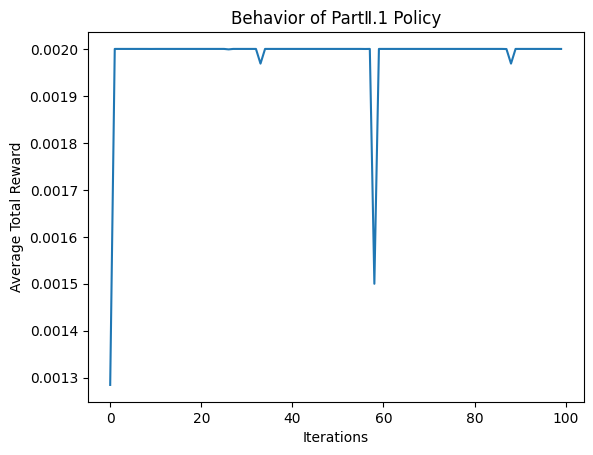

In [46]:
### Your code for problem 2.1. Feel free to insert more blocks or helper functions if you need.
import numpy as np
import matplotlib.pyplot as plt
num_arms = 2
alpha = [1, 1]  # Prior parameters for arm 1 and arm 2
beta = [1, 1]   # Prior parameters for arm 1 and arm 2
gamma = 0.5     # Reward parameter
num_iterations = 100   # Number of iterations
num_time_slots = 1000  # Number of time slots in each iteration

total_rewards = np.zeros(num_iterations)
for iteration in range(num_iterations):
    # Initialize prior distributions
    theta = np.random.beta(alpha, beta)
    # Perform pulls in each time slot
    for t in range(num_time_slots):
        # Calculate expected values
        expected_values = theta
        # Select arm with largest expected value
        selected_arm = np.argmax(expected_values)
        # Simulate pull and observe outcome
        outcome = np.random.binomial(1, theta[selected_arm])
        # Update parameters of selected arm
        if outcome == 1:
            alpha[selected_arm] += 1
        else:
            beta[selected_arm] += 1
        # Update total reward
        total_rewards[iteration] += gamma**(t) * outcome
# Calculate average total reward over iterations
average_rewards = total_rewards / num_time_slots

plt.plot(range(num_iterations), average_rewards)
plt.xlabel('Iterations')
plt.ylabel('Average Total Reward')
plt.title('Behavior of PartⅡ.1 Policy')
plt.show()

    We implement the code by following the steps below:
    
    1.Define some necessary parameters
    
    2.Initialize the prior distributions for each arm using Beta distribution with parameters αi and βi.
    
    3.For each time slot:
        Calculate the expected value of each arm using the current Beta distributions.
        Select the arm with the largest expected value.
        Pull the selected arm and observe the outcome (success or failure).
        Update the parameters of the corresponding Beta distribution based on the observed outcome.
        Repeat the above steps for subsequent time slots.
    4.Analyze the results:
        Calculate the average total reward obtained over all iterations.
        Plot the average total reward over iterations to observe the performance of the policy.
    
    Conclusion: It's easy to find that the policy behaves very good in most cases since "Average Total Reward" always keeps in a high level between "Iterations" [0,100].

2. However, such intuitive policy is unfortunately not optimal.
	Please provide an example to show why such policy is not optimal. 

**Your anwser of problem 2 in Part II**

In [47]:
import numpy as np
theta = [0.2, 0.8]  # True success probabilities
gamma = 0.5 
alpha = [1, 1]  # Prior parameters for arm 1 and arm 2
beta = [1, 1]   # Prior parameters for arm 1 and arm 2
num_time_slots = 10

for t in range(num_time_slots):
    # Calculate expected values
    expected_values = np.array([alpha[i] / (alpha[i] + beta[i]) for i in range(2)])
    # Select arm with largest expected value
    selected_arm = np.argmax(expected_values)
    # Simulate pull and observe outcome
    outcome = np.random.binomial(1, theta[selected_arm])
    # Update parameters of selected arm
    if outcome == 1:
        alpha[selected_arm] += 1
    else:
        beta[selected_arm] += 1
    print(f"Time Slot {t+1}: Selected Arm {selected_arm+1}, Outcome {outcome}, Alpha {alpha}, Beta {beta}")

Time Slot 1: Selected Arm 1, Outcome 0, Alpha [1, 1], Beta [2, 1]
Time Slot 2: Selected Arm 2, Outcome 1, Alpha [1, 2], Beta [2, 1]
Time Slot 3: Selected Arm 2, Outcome 0, Alpha [1, 2], Beta [2, 2]
Time Slot 4: Selected Arm 2, Outcome 1, Alpha [1, 3], Beta [2, 2]
Time Slot 5: Selected Arm 2, Outcome 1, Alpha [1, 4], Beta [2, 2]
Time Slot 6: Selected Arm 2, Outcome 1, Alpha [1, 5], Beta [2, 2]
Time Slot 7: Selected Arm 2, Outcome 0, Alpha [1, 5], Beta [2, 3]
Time Slot 8: Selected Arm 2, Outcome 0, Alpha [1, 5], Beta [2, 4]
Time Slot 9: Selected Arm 2, Outcome 1, Alpha [1, 6], Beta [2, 4]
Time Slot 10: Selected Arm 2, Outcome 0, Alpha [1, 6], Beta [2, 5]


    In our example, the intuitive policy consistently selects arm 2（except the 1st time） with higher initial success probability in each time slot. As a result, the algorithm keeps updating the parameters of arm 2 based on the observed successes, and arm 2's Beta distribution gradually shifts towards higher success probabilities.

    However, since arm 1 has a lower initial success probability, it may take more time slots to observe a success from arm 1. If we explore arm 1 more in the very beginning, we may have a chance to discover that arm 1 has a higher potential success probability, which will lead to higher rewards in the long run.

    The example shows that the intuitive policy always selecting the arm with the largest current expected value of θi is not optimal in situations where the initial probabilities may not accurately represent the long-term behavior of the arms. As we have done in PartⅠ, the UCB algorithm or TS is often employed to balance exploration and exploitation and achieve better long-term rewards.

3. For the expected total reward under an optimal policy, show that the following recurrence equation holds:

\begin{equation*}
		\begin{aligned}
			R_{1}(\alpha_{1},\beta_{1}) 
			= & \frac{\alpha_{1}}{\alpha_{1}+\beta_{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
				& + \frac{\beta_{1}}{\alpha_{1} + \beta_{1}} [\gamma R(\alpha_{1}, \beta_{1} + 1, \alpha_{2}, \beta_{2})]; \\
			R_{2}(\alpha_{2}, \beta_{2}) 
			= & \frac{\alpha_{2}}{\alpha_{2} + \beta_{2}} [1 + \gamma R(\alpha_{1}, \beta_{1}, \alpha_{2} + 1, \beta_{2})] \\
				& + \frac{\beta_{2}}{\alpha_{2} + \beta_{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
			R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2}) 
			= & \max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.
		\end{aligned}  	
	\end{equation*}

**Your anwser of problem 3 in Part II**

First we need to figure out the meaning of 3 notations:
- R1(α1, β1) represents the expected total reward when selecting arm 1 with prior parameters α1 and β1.
- R2(α2, β2) represents the expected total reward when selecting arm 2 with prior parameters α2 and β2.
- R(α1, β1, α2, β2) represents the overall expected total reward under an optimal policy, where α1, β1, α2, β2 are the prior parameters for arm 1 and arm 2.

Consider the expected total reward when selecting arm 1 or arm 2 in the current time slot:
1. When selecting arm 1:
   - The expected reward for selecting arm 1 is γ multiplied by the reward obtained from the current pull, which is either 1 (success) or 0 (failure).
   - If arm 1 is successful (outcome = 1), the prior parameters for arm 1 are updated to α1 + 1 and β1.
   - If arm 1 fails (outcome = 0), the prior parameters for arm 1 are updated to α1 and β1 + 1.
   - The expected total reward for selecting arm 1 can be calculated recursively using the updated prior parameters.
2. When selecting arm 2:
   - The expected reward for selecting arm 2 is γ multiplied by the reward obtained from the current pull, which is either 1 (success) or 0 (failure).
   - If arm 2 is successful (outcome = 1), the prior parameters for arm 2 are updated to α2 + 1 and β2.
   - If arm 2 fails (outcome = 0), the prior parameters for arm 2 are updated to α2 and β2 + 1.
   - The expected total reward for selecting arm 2 can be calculated recursively using the updated prior parameters.

Based on these considerations, the recurrence equation for the expected total reward can be expressed as follows:

\begin{equation*}
	\begin{aligned}
		R_{1}(\alpha_{1},\beta_{1}) 
		= & \frac{\alpha_{1}}{\alpha_{1}+\beta_{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
			& + \frac{\beta_{1}}{\alpha_{1} + \beta_{1}} [\gamma R(\alpha_{1}, \beta_{1} + 1, \alpha_{2}, \beta_{2})]; \\
		R_{2}(\alpha_{2}, \beta_{2}) 
		= & \frac{\alpha_{2}}{\alpha_{2} + \beta_{2}} [1 + \gamma R(\alpha_{1}, \beta_{1}, \alpha_{2} + 1, \beta_{2})] \\
			& + \frac{\beta_{2}}{\alpha_{2} + \beta_{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
		R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2}) 
		= & \max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.
	\end{aligned}  	
\end{equation*}

In these equations, we recursively calculate the expected total reward for selecting arm 1 and arm 2, considering the updated prior parameters after each pull. The overall expected total reward is the maximum between R1(α1, β1) and R2(α2, β2), representing the optimal policy of selecting the arm with the highest expected value at each time slot. The recurrence equation provides a framework for evaluating the expected total reward under an optimal policy in the Bayesian bandit problem. By solving the recurrence equation, we can compute the expected total reward for specific values of α1, β1, α2, and β2.

4. For the above equations, how to solve it exactly or approximately? 

**Your anwser of problem 4 in Part II**

    We think there are at least two approaches:

    1. Dynamic Programming: By starting from the base cases and iteratively calculating the values for different states, we can build up the solutions until we reach the desired state. This approach can be computationally expensive as the number of states increases, but it guarantees an exact solution.

    2. Monte Carlo Method: Using Monte Carlo simulation or Monte Carlo tree search, we can sample from the state space and estimate the expected total reward based on the sampled outcomes. By repeating this process multiple times and averaging the results, we can approximate the solutions to the recurrence equations. The method can be used when the state space is large or when an exact solution is not feasible.

    The choice of method depends on the complexity of the problem, the size of the state space, and the available computational resources. In some cases, it may be possible to derive closed-form solutions for specific scenarios or simplify the recurrence equations using certain assumptions. However, exact solutions may not be easily achievable. Thus, approximation methods are commonly employed to estimate the expected total reward.

5. Find the optimal policy.

**Your anwser of problem 5 in Part II**

The main idea is that we apply Depth Search to the bandit while simultaneously record the selection of recursion every time to get the total expected reward based on $\alpha_1, \alpha_2, \beta_1, \beta_2$ i.e. $R(\alpha_1, \beta_1, \alpha_2,  \beta_2)$. Then, from the recursive selection we have recorded, we can construct a tree structure to represent our entire recursive process so we let $R(\alpha_1, \beta_1, \alpha_2,  \beta_2)$ with initial $\alpha_1, \alpha_2, \beta_1, \beta_2$ to be the root node and the last $R(\alpha_1, \beta_1, \alpha_2,  \beta_2)$ which we gained in the $N$ th slot to be the leaf node . Therefore, our selection for each slot only needs to follow the path from the root node to the leaf node and we will get the highest total reward. 

The code below shows the difference between the total reward we gained from the algorithm and the ideal total reward.

In [61]:
### Your code for problem 2.5. Feel free to insert more blocks or helper functions if you need.
cmp=[0,0]
ct=[0,0,0,0]
r=0
r1=0
t=100
def iter(t,a1,b1,a2,b2):
    if(t!=1):
        t-=1
        R=max(a1/(a1+b1)*(1+gamma*iter(t,a1+1,b1,a2,b2))+b1/(a1+b1)*(gamma*iter(t,a1,b1+1,a2,b2)),a2/(a2+b2)*(1+gamma*iter(t,a1,b1,a2+1,b2))+b2/(a2+b2)*(gamma*iter(t,a1,b1,a2,b2+1)))
    else:
        R=max(a1/(a1+b1),a2/(a2+b2))
    return R
for i in range (5000):
    p_2=np.random.uniform(0,1)
    if(p_2<theta[1]):
        r+=gamma**i
print("from dp",iter(15,2000,8000,8000,2000))
print("ideal",r)


from dp 1.5999511718750001
ideal 1.871081077404026


The error may be significant because when the total number of time solts is 15, the recursive process requires a lot of time to get the result